In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
# Load the Iris dataset
df = sns.load_dataset("iris")

In [19]:
print(df.head())

   sepal_length  petal_length  species
0           5.1           1.4        0
1           4.9           1.4        0
2           4.7           1.3        0
3           4.6           1.5        0
4           5.0           1.4        0


In [4]:
# Encode the output column.
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [20]:
print(df.head())

   sepal_length  petal_length  species
0           5.1           1.4        0
1           4.9           1.4        0
2           4.7           1.3        0
3           4.6           1.5        0
4           5.0           1.4        0


In [6]:
# Reduce the dataset to only numerical values.
df = df[['sepal_length', 'petal_length', 'species']]

In [21]:
print(df.head())

   sepal_length  petal_length  species
0           5.1           1.4        0
1           4.9           1.4        0
2           4.7           1.3        0
3           4.6           1.5        0
4           5.0           1.4        0


In [8]:
# Separate the Input and Output data.
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [9]:
# Split the data into test and training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
clf = LogisticRegression()

In [15]:
# Train the model.
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [22]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
print(confusion_matrix)

    0  1  2
0  14  0  0
1   0  7  1
2   0  0  8


In [27]:
import warnings
warnings.filterwarnings("ignore")
query = np.array([3.4, 2.7]).reshape(1, -1)
print(clf.predict_proba(query))

[[7.25865651e-01 2.73720718e-01 4.13631316e-04]]


In [28]:
clf.predict(query)

array([0])

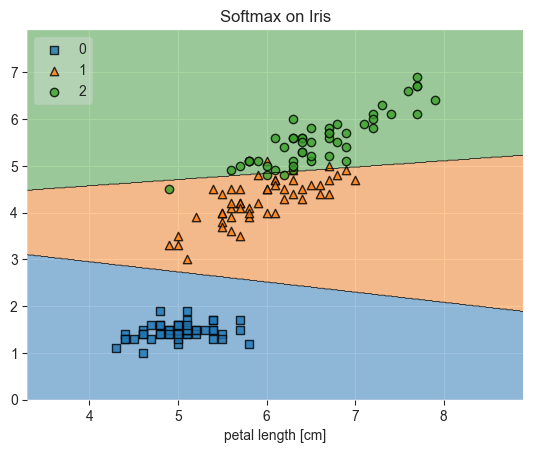

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()